## 1. Import packages

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

sns.set(color_codes = True)

## 2. Loading the data with Pandas

In [2]:
df = pd.read_csv(r'C:\Users\Chidinma\Desktop\housing.csv')

In [3]:
df = df.copy()

In [4]:
#checking for duplicates
df.duplicated().sum()

0

In [5]:
#checking for number of unique values
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [6]:
#Checking for missing values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
#Handling Missing values
#The number of missing values is less than 5% of the size of the dataset, hence I will be dropping all rows with 
#missing data from the total_bedcroom column.
df = df.dropna(subset = ['total_bedrooms'])

In [8]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### Hypothesis
Increased ocean_proximity is the key determinant of house prices in California

## 2. Exploratory Data Analysis (Summary statistics and Visualizations)

In [10]:
#The latitude and longitude values will have no bearing on my final analysis, so i decided to drop it
df.drop(columns=['latitude', 'longitude'], inplace=True)

In [11]:
df.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 2.2. Data Visualization

#### Ocean Proximity

<Axes: xlabel='ocean_proximity'>

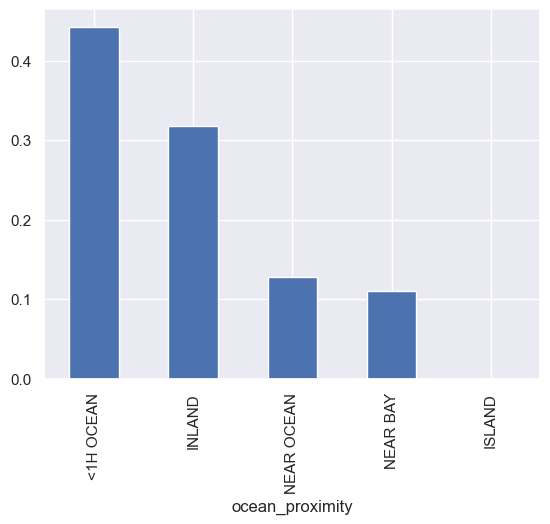

In [12]:
#A plot showing how close these houses are to the ocean
(df['ocean_proximity'].value_counts()/len(df)).plot.bar()

<Axes: xlabel='ocean_proximity'>

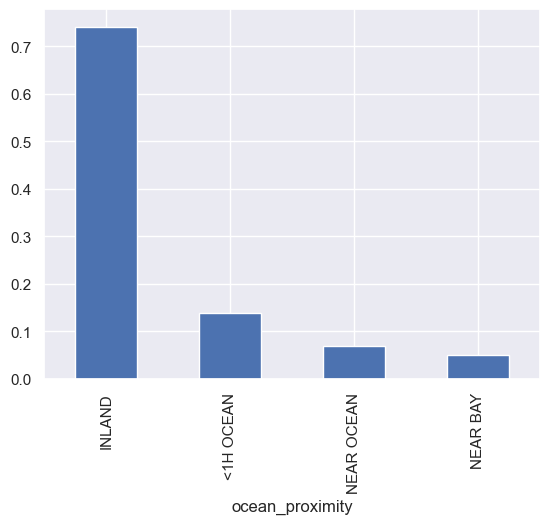

In [13]:
#Visualizing the cheapest and most expensive houses in relation to their location to the ocean

#defining cheap houses as houses whose prices are below the 25th percentile
price_threshold = df['median_house_value'].quantile(0.25)
cheap_houses = df[df['median_house_value']<= price_threshold]
#Visualizing cheap houses in relation to ocean_proximity
(cheap_houses['ocean_proximity'].value_counts()/len(cheap_houses)).plot.bar()

<Axes: xlabel='ocean_proximity'>

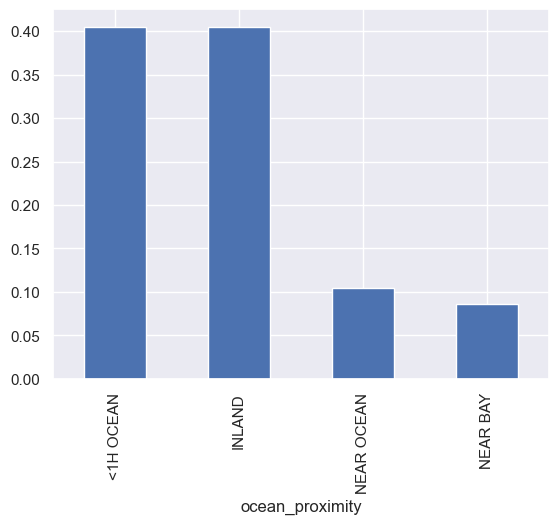

In [14]:
#defining expensive houses as houses whose prices are above the 75th percentile
price_threshold1 = df['median_house_value'].quantile(0.75)
expensive_houses = df[df['median_house_value']<= price_threshold1]
#Visualizing expensive houses in relation to ocean_proximity
(expensive_houses['ocean_proximity'].value_counts()/len(expensive_houses)).plot.bar()

### Median Housing Age

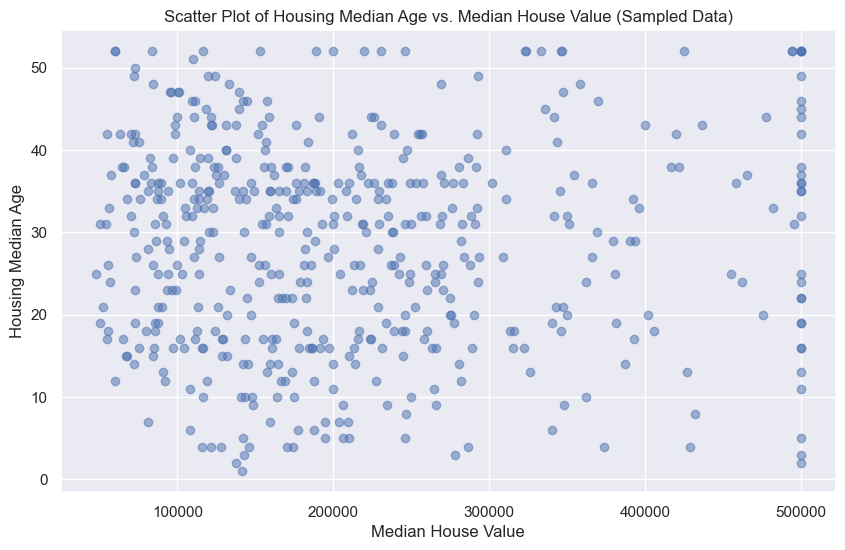

In [15]:
### Are new houses more expensive than old houses (done using sampled data of 500 houses)
df2 = df[['housing_median_age', 'median_house_value']]

# A random sample of the data (a chart with all observations is uninterpretable)
sampled_df2 = df2.sample(n=500, random_state=42)

# Create a scatter plot with the sample
plt.figure(figsize=(10, 6))
plt.scatter(sampled_df2['median_house_value'], sampled_df2['housing_median_age'], alpha=0.5)
plt.title('Scatter Plot of Housing Median Age vs. Median House Value (Sampled Data)')
plt.xlabel('Median House Value')
plt.ylabel('Housing Median Age')
plt.show()

### Median House Value

<Axes: ylabel='Frequency'>

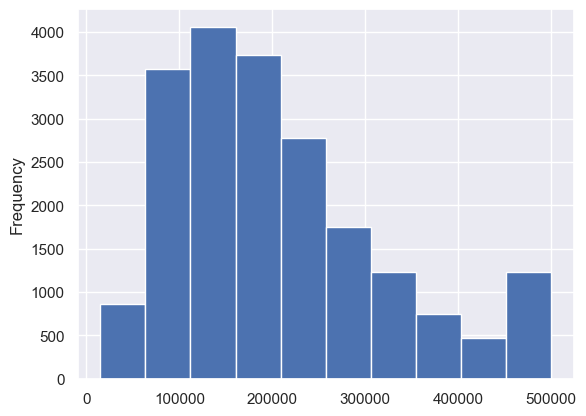

In [16]:
###Visualizing categories of house prices
df['median_house_value'].plot.hist()

### Total Rooms

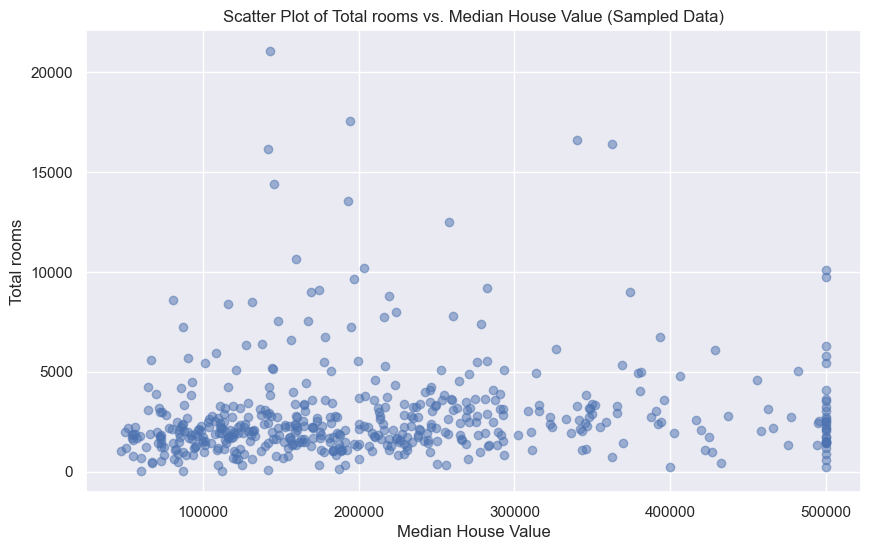

In [17]:
#Does the number of rooms affect the value of a house?
df3 = df[['total_rooms', 'median_house_value']]

# A random sample of the data (a chart with all observations is uninterpretable)
sampled_df3 = df3.sample(n=500, random_state=42)

# Creaing a scatter plot with the sample
plt.figure(figsize=(10, 6))
plt.scatter(sampled_df3['median_house_value'], sampled_df3['total_rooms'], alpha=0.5)
plt.title('Scatter Plot of Total rooms vs. Median House Value (Sampled Data)')
plt.xlabel('Median House Value')
plt.ylabel('Total rooms')
plt.show()

### Median Income

<Axes: xlabel='median_house_value', ylabel='median_income'>

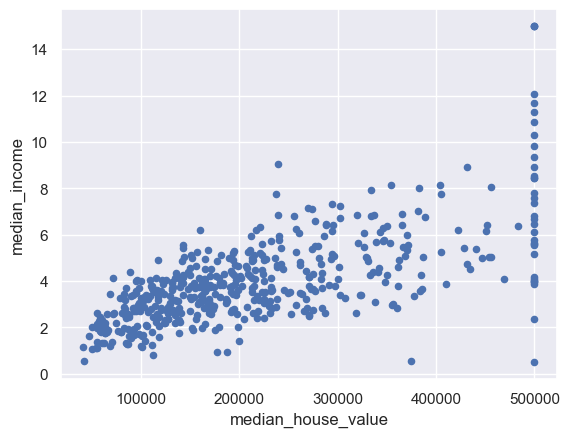

In [18]:
#Visualizing the median income in relation to house prices
df4 = df[['median_income','median_house_value']]
# A random sample of the data (a chart with all observations is uninterpretable)
df4.sample(500).plot.scatter(x='median_house_value', y = 'median_income')

## 2.3 Handling Outliers

### Visualizing outliers

<Axes: >

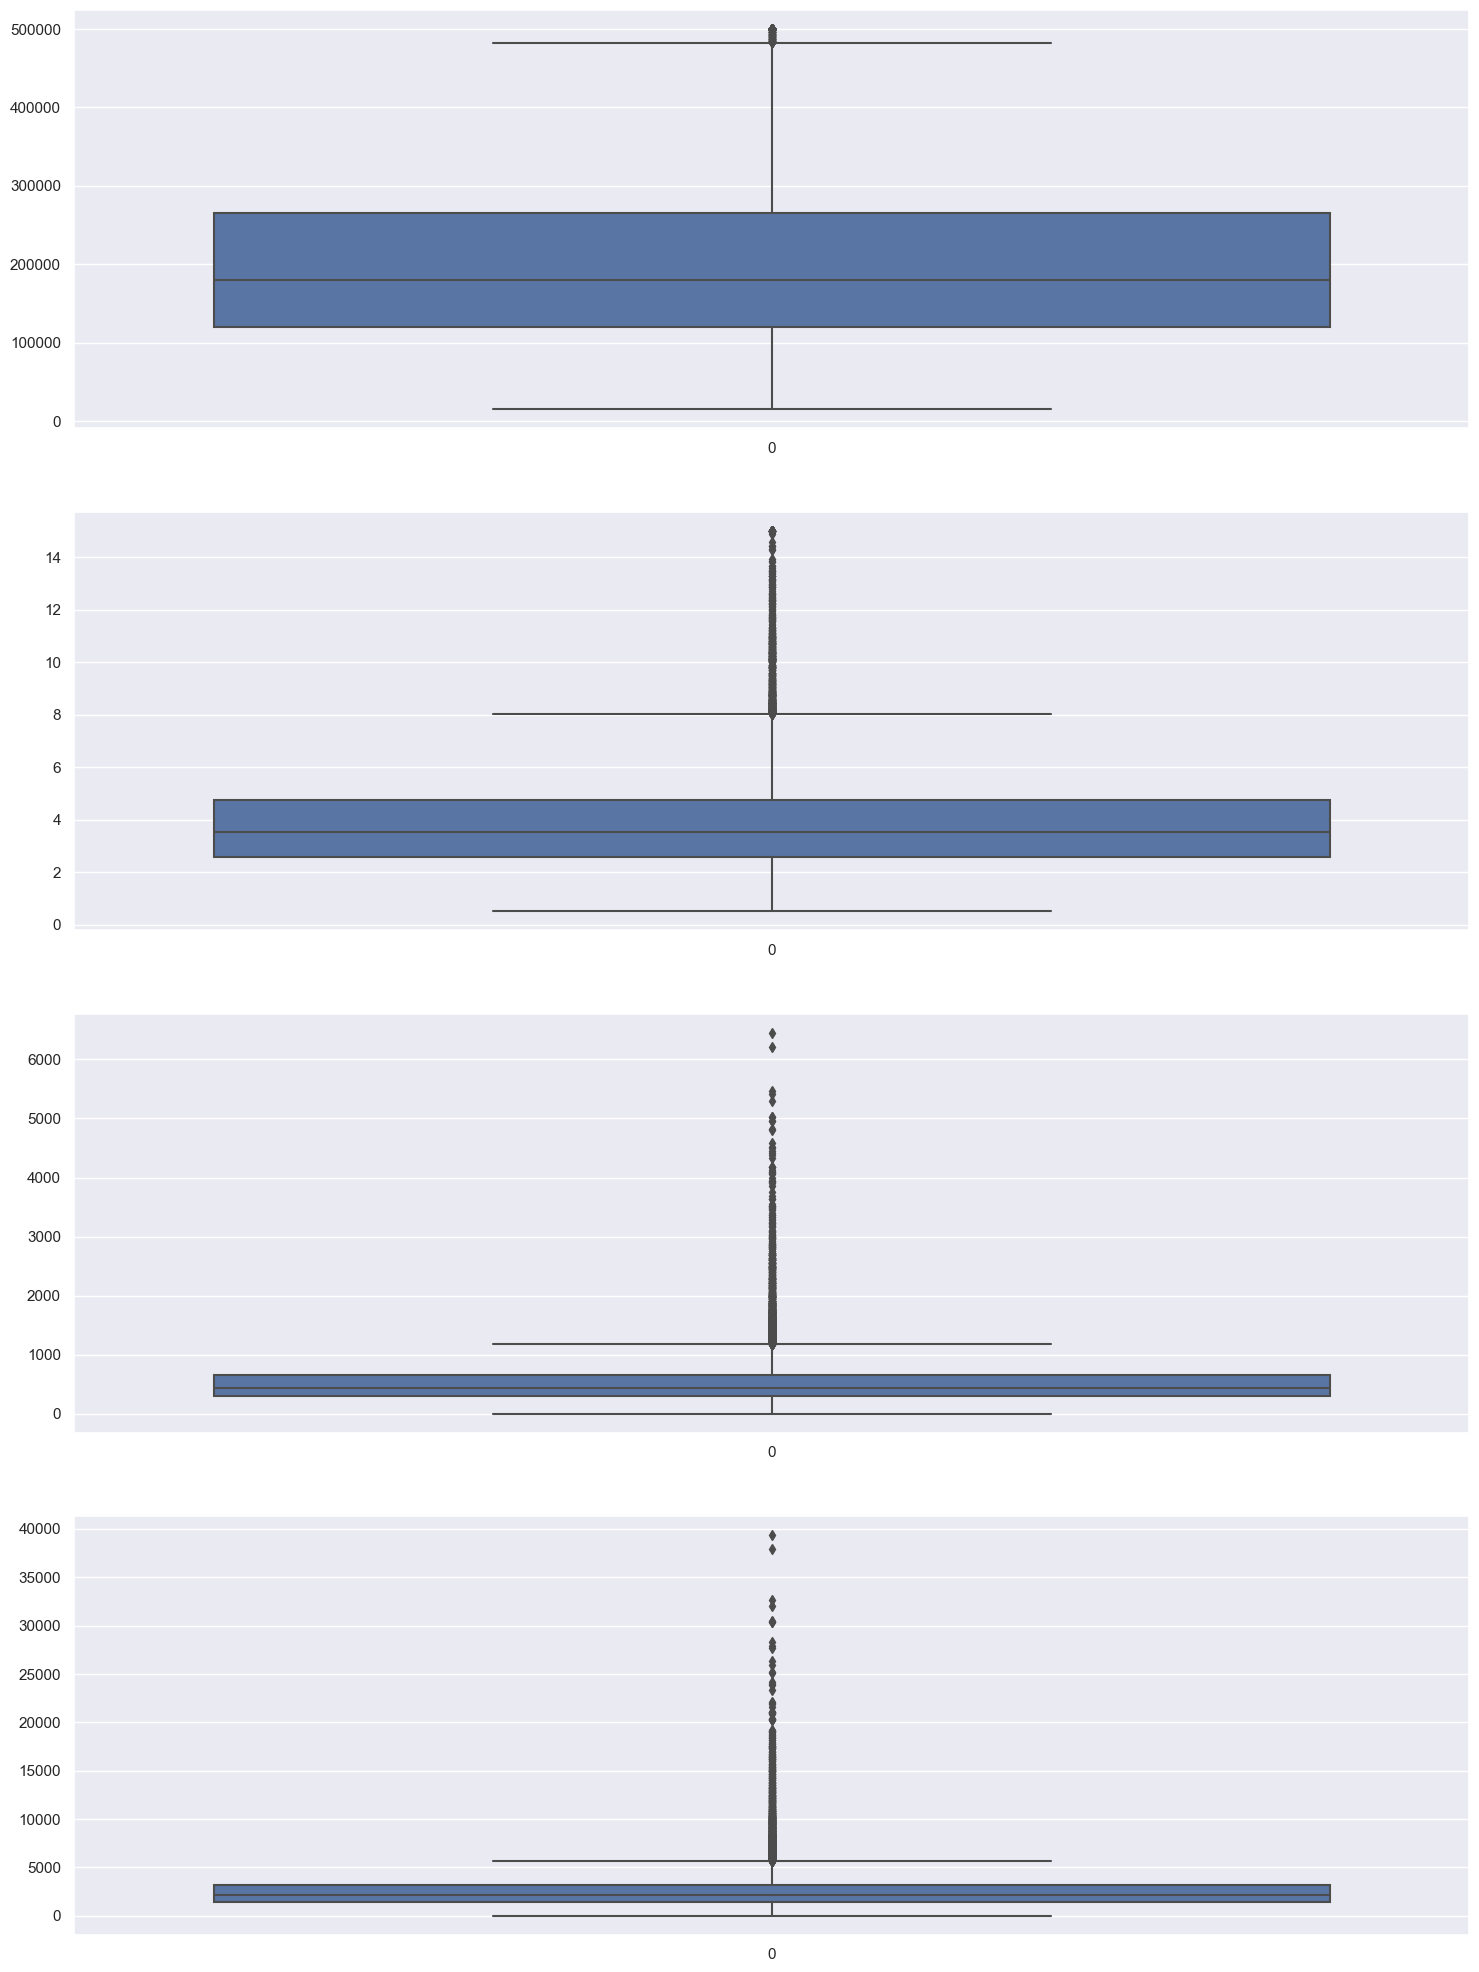

In [19]:
#define dimensions of subplots
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

# Plot histogram
sns.boxplot(df["median_house_value"], ax=axs[0])
sns.boxplot(df["median_income"], ax=axs[1])
sns.boxplot(df["total_bedrooms"], ax=axs[2])
sns.boxplot(df["total_rooms"], ax=axs[3])


Due to the presence of outliers, the data is right-skewed (positively skewed). We'll need to treat this to ensure that our data follows a normal distribution or something very close to it, if our data isn't treated our models will make wrong assumptions about our data leading to wrong predictions. For this use case we will use the 'Logarithm' transformation (as it work best for strong right-skewed data) for the positively skewed features.

Note: We cannot apply log to a value of 0, so we will add a constant of 1 to all the values

In [20]:
#statistics before logarithmic transformation
df.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [21]:
#Handling outliers
# Apply log10 transformation
df["housing_median_age"] = np.log10(df["housing_median_age"])
df["median_house_value"] = np.log10(df["median_house_value"])
df["median_income"] = np.log10(df["median_income"])
df["total_bedrooms"] = np.log10(df["total_bedrooms"])
df["total_rooms"] = np.log10(df["total_rooms"])
df["population"] = np.log10(df["population"])
df["households"] = np.log10(df["households"])

In [22]:
#Statistics after transformation
#A reduction in the standard deviation is seen
df.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,1.400481,3.313120,2.627943,3.050368,2.597357,0.540534,5.248389
std,0.246765,0.326509,0.318245,0.320784,0.318431,0.204395,0.247210
min,0.000000,0.301030,0.000000,0.477121,0.000000,-0.301117,4.176062
25%,1.255273,3.161368,2.471292,2.895975,2.447158,0.408867,5.077368
50%,1.462398,3.327767,2.638489,3.066699,2.611723,0.548574,5.254548
75%,1.568202,3.497344,2.810904,3.236033,2.781037,0.676145,5.422754
max,1.716003,4.594614,3.809223,4.552449,3.784046,1.176094,5.698971


C:\Users\Chidinma\AppData\Local\Temp\ipykernel_26236\559357917.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df["housing_median_age"].dropna()), ax=axs[0])
C:\Users\Chidinma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Chidinma\AppData\Local\Temp\ipykernel_26236\559357917.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figur

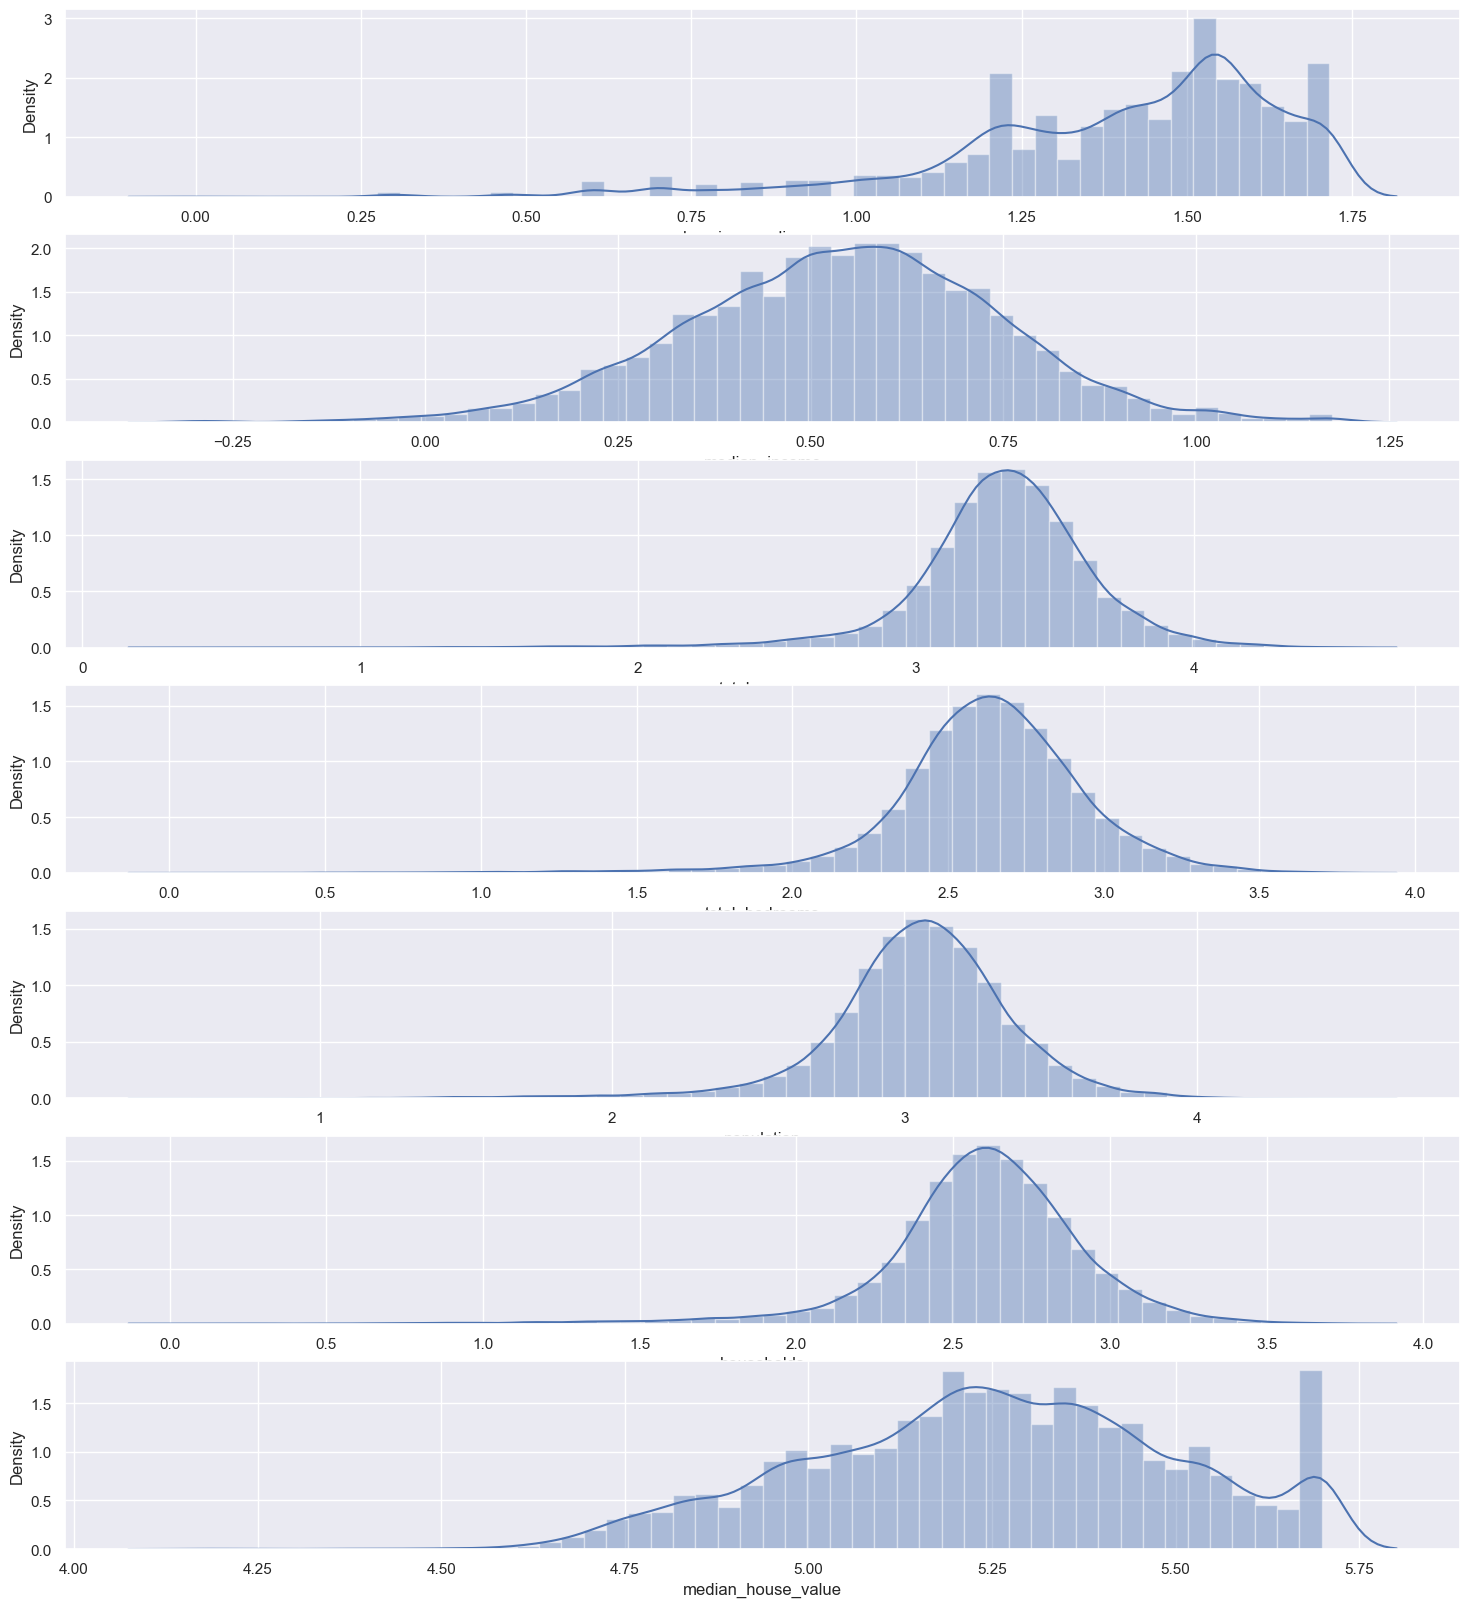

In [23]:
fig, axs = plt.subplots(nrows=7, figsize=(18, 20))
# Plot histograms
sns.distplot((df["housing_median_age"].dropna()), ax=axs[0])
sns.distplot((df["median_income"].dropna()), ax=axs[1])
sns.distplot((df["total_rooms"].dropna()), ax=axs[2])
sns.distplot((df['total_bedrooms'].dropna()), ax=axs[3])
sns.distplot((df["population"].dropna()), ax=axs[4])
sns.distplot((df["households"].dropna()), ax=axs[5])
sns.distplot((df["median_house_value"].dropna()), ax=axs[6])
plt.show()

### Feature Engineering
New features that boost the models' performance are created

In [25]:
#Neighbourhood type
# Calculate the quartiles for the income
income_lower_quartile = df['median_income'].quantile(0.25)
income_upper_quartile = df['median_income'].quantile(0.75)

# Define the criteria for neighborhood types based on the income quartiles
def classify_neighborhood_type(row, lower_quartile, upper_quartile):
    if row['median_income'] <= lower_quartile:
        return 'Low Income Neighborhood'
    elif row['median_income'] <= upper_quartile:
        return 'Middle Income Neighborhood'
    else:
        return 'High Income Neighborhood'

# Apply the function to classify neighborhood types using income quartiles
df['neighborhood_type'] = df.apply(classify_neighborhood_type, axis=1, args=(income_lower_quartile, income_upper_quartile))

# Display the first few rows to verify the new column
print(df[['median_income', 'neighborhood_type']].head())



   median_income           neighborhood_type
0       0.920395    High Income Neighborhood
1       0.919151    High Income Neighborhood
2       0.860781    High Income Neighborhood
3       0.751518    High Income Neighborhood
4       0.585032  Middle Income Neighborhood


### Transforming categorical variables
Transformation is carried out using label encoding and one-hot encoding. The neighbourhood_type column is transformed using label encoding. Label encoding transforms each data into a unique number; it works best for ordered data for example; low, middle, and high correspond to 0,1,2. One-hot encoding transforms each data entry in the categorical feature into a binary column. In each of the new columns, 1 corresponds to the presence of the variable and 0 corresponds to the absence. It's best used when the categorical feature is nominal; this technique will be employed in the ocean_proximity column 

In [26]:
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,neighborhood_type
0,1.612784,2.944483,2.110590,2.507856,2.100371,0.920395,5.655715,NEAR BAY,High Income Neighborhood
1,1.322219,3.851197,3.043755,3.380392,3.056142,0.919151,5.554489,NEAR BAY,High Income Neighborhood
2,1.716003,3.166430,2.278754,2.695482,2.247973,0.860781,5.546666,NEAR BAY,High Income Neighborhood
3,1.716003,3.105169,2.371068,2.746634,2.340444,0.751518,5.533136,NEAR BAY,High Income Neighborhood
4,1.716003,3.211388,2.447158,2.752048,2.413300,0.585032,5.534280,NEAR BAY,Middle Income Neighborhood


In [27]:
from sklearn.preprocessing import LabelEncoder
#I decided to use a custom mapping because the label encoder was mapping 0 to high Income and 2 to low income neigborhood, which i feel 
#is wrong since the order should be in an increasing fashion
# Define the custom mapping
custom_mapping = {
    'Low Income Neighborhood': 0,
    'Middle Income Neighborhood': 1,
    'High Income Neighborhood': 2
}

# Apply the custom mapping to create the encoded column
df['neighborhood_type'] = df['neighborhood_type'].map(custom_mapping)



In [28]:
import pandas as pd

# Perform One-Hot Encoding
df_dummies = pd.get_dummies(df, columns=['ocean_proximity'])

#My one-hot encoding gives boolean values instead of 0 and 1 features, so I have to transform it
boolean_columns = ['ocean_proximity_<1H OCEAN','ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
                   'ocean_proximity_NEAR OCEAN']
df_dummies[boolean_columns] = df_dummies[boolean_columns].astype(int)

df = df_dummies




In [29]:
df = df_dummies
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,neighborhood_type,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.612784,2.944483,2.110590,2.507856,2.100371,0.920395,5.655715,2,0,0,0,1,0
1,1.322219,3.851197,3.043755,3.380392,3.056142,0.919151,5.554489,2,0,0,0,1,0
2,1.716003,3.166430,2.278754,2.695482,2.247973,0.860781,5.546666,2,0,0,0,1,0
3,1.716003,3.105169,2.371068,2.746634,2.340444,0.751518,5.533136,2,0,0,0,1,0
4,1.716003,3.211388,2.447158,2.752048,2.413300,0.585032,5.534280,1,0,0,0,1,0


### 4. Modelling

We will now import the relevant libraries. All our libraries are designed to tackle the regression nature of our problem (predicting a continous numerical variable for given inputs)

In [30]:
#Import relevant libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




## Sampling the data

In [31]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['median_house_value']
X = df.drop(columns=['median_house_value'])
print(X.shape)
print(y.shape)

(20433, 12)
(20433,)


In [32]:
#Spliting our dataset (75 percent for the training set and 25percent for the test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15324, 12)
(15324,)
(5109, 12)
(5109,)


### Linear Regression Model
This is a type of supervised learning algorithm that computes the linear relationship between the dependent variable and one or more independent features by fitting a linear equation to observed data. How a linear regression works is to find the best coefficients that reduce the error between the observed and predicted values (y_test and y_pred_initial)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# x and y are our independent and target variables respectively 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the initial Linear Regression model
initial_model = LinearRegression()
initial_model.fit(X_train, y_train)

# Predictions and evaluation on the test set
y_pred_initial = initial_model.predict(X_test)
initial_r2 = r2_score(y_test, y_pred_initial)
initial_mae = mean_absolute_error(y_test, y_pred_initial)
initial_rmse = mean_squared_error(y_test, y_pred_initial, squared=False)


print(f'Initial R²: {initial_r2}')
print(f'Initial Test MAE: {initial_mae}')
print(f'Initial Test RMSE: {initial_rmse}')


Initial R²: 0.6815513176475336
Initial Test MAE: 0.1070048814775393
Initial Test RMSE: 0.14105137123694036


### Hyperparameter tuning of the linear regression model 
The linear regression model's hyperparameters will be tuned using GridSearch CV. Hyperparameters are parameters set before the modeling process and control the model performance. Ridge regression is a type of linear regression characterized by the use of L2 regularization (adding a penalty to the loss function equivalent to the square of the models' coefficients) to reduce overfitting. This is done by adjusting the alpha value (the regularization strength parameter), higher values of alpha lead to more regularization. GridSeach CV is the hyperparameter tuning tool. We supply a grid of alpha values, which cross-validated (compared and tested) to find the best alpha value that will our model a much better performance.

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Ridge regression model
ridge = Ridge()

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.ch.best_score_)


Best parameters: {'alpha': 0.1}
Best cross-validation MSE: 0.020149024437450744


In [35]:
# Retrain Ridge regression with the best hyperparameters
final_model = Ridge(alpha=grid_search.best_params_['alpha'])
final_model.fit(X_train, y_train)

# Predictions and evaluation on the test set
y_pred_final = final_model.predict(X_test)
final_r2 = r2_score(y_test, y_pred_final)
final_mae = mean_absolute_error(y_test, y_pred_final)
final_rmse = mean_squared_error(y_test, y_pred_final, squared=False)


print(f'Final R²: {final_r2}')
print(f'Final Test MAE: {final_mae}')
print(f'Final Test RMSE: {final_rmse}')


Final R²: 0.6813393630377444
Final Test MAE: 0.10704161233497327
Final Test RMSE: 0.14109830425472294


### Decision Trees
A Decision tree is an algorithm used for both regression and classification problems. It is a flowchart-like structure used to make predictions. It consists of nodes representing decisions or tests on attributes, branches representing the outcome of these decisions, and leaf nodes representing final outcomes or predictions. Each internal node corresponds to a test on an attribute, each branch corresponds to the result of the test, and each leaf node corresponds to a class label or a continuous value. How a decision tree works is to 'sort of divide' repeatedly till the stopping criterion is fufilled.

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Example: Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a basic Decision Tree Classifier
Initial_model = DecisionTreeRegressor(random_state=42)
Initial_model.fit(X_train, y_train)

# Predictions and evaluation on the test set
initial_y_pred = initial_model.predict(X_test)

# Calculate baseline metrics
initial_mae = mean_absolute_error(y_test, initial_y_pred)
initial_rmse = mean_squared_error(y_test, initial_y_pred, squared=False)
initial_r2 = r2_score(y_test, initial_y_pred)

print(f'initial MAE: {initial_mae}')
print(f'initial RMSE: {initial_rmse}')
print(f'initial R²: {initial_r2}')


initial MAE: 0.1070048814775393
initial RMSE: 0.14105137123694036
initial R²: 0.6815513176475336


### Hyperparameter Tuning of the Decision Tree Model
-Max depth: controls the depth of the tree, limiting the depth prevents overfitting by stopping it from learning too many details abouth the training data.
-Min_samples_split: The minimum number of samples required to split an internal node. Higher values prevent the tree from splitting too often, which can reduce overfitting.
-min_samples_leaf: The minimum number of samples that must be present in a leaf node. It prevents the creation of leaf nodes that contain only a few data points, which can be noisy.
-max_features: The number of features to consider when looking for the best split. By reducing the number of features considered at each split can make the model more general and prevent overfitting.


In [37]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

# Initialize a Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(decision_tree, param_grid, cv=5,n_jobs=-1, scoring = 'neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)



Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


### Retrain final model
A final decision tree regressor is trained with the best hyper-tuned values

In [38]:
# Retrain the Decision Tree Regressor with the best hyperparameters
final_model = DecisionTreeRegressor(
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    max_features=grid_search.best_params_['max_features'],
    random_state=42
)
final_model.fit(X_train, y_train)


#Prediction and evaluation of the final model
# Use the final model to make predictions on the test set
y_pred_test = final_model.predict(X_test)

# Calculate evaluation metrics
final_mae = mean_absolute_error(y_test, y_pred_test)
final_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
final_r2 = r2_score(y_test, y_pred_test)

print(f'Final Test MAE: {final_mae}')
print(f'Final Test RMSE: {final_rmse}')
print(f'Final Test R²: {final_r2}')




Final Test MAE: 0.10782426908413116
Final Test RMSE: 0.14590050900185564
Final Test R²: 0.6592793581238698


### Random Forests
This is an ensemble ML method. A Random Forest is essentially a collection of decision trees, typically trained with the "bagging" method. The idea is that by combining multiple models, you can reduce the risk of overfitting and improve the overall accuracy of your predictions. 

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example: Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a basic Random Forest Regressor
initial_model = RandomForestRegressor(random_state=42)
initial_model.fit(X_train, y_train)

# Predictions and evaluation on the test set
initial_y_pred = initial_model.predict(X_test)

# Calculate baseline metrics
initial_mae = mean_absolute_error(y_test, initial_y_pred)
initial_rmse = mean_squared_error(y_test, initial_y_pred, squared=False)
initial_r2 = r2_score(y_test, initial_y_pred)

print(f'Initial MAE: {initial_mae}')
print(f'Initial RMSE: {initial_rmse}')
print(f'Initial R²: {initial_r2}')


Initial MAE: 0.09446296259460973
Initial RMSE: 0.12848754706276067
Initial R²: 0.7357549214689315


### Hyperparameter tuning of the Random Forest Model
-n_estimators: The number of trees in the forest. More trees generally result in better performance, but they also increase the computational cost and memory usage. Increasing the number of trees can reduce variance and improve the model's performance.

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions,
    n_iter=10,  # Number of parameter settings to sample
    cv=3,
    n_jobs=-1, scoring = 'neg_mean_absolute_error',
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best parameters found by Randomized Search:", random_search.best_params_)


Best parameters found by Randomized Search: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}


### Retrain the final model

In [41]:
# Retrain the Random Forest Regressor with the best hyperparameters
RF_model = RandomForestRegressor(
    n_estimators=random_search.best_params_['n_estimators'],
    max_depth=random_search.best_params_['max_depth'],
    min_samples_split=random_search.best_params_['min_samples_split'],
    min_samples_leaf=random_search.best_params_['min_samples_leaf'],
    max_features=random_search.best_params_['max_features'],
    random_state=42
)
RF_model.fit(X_train, y_train)

# Use the final model to make predictions on the test set
y_pred_test = RF_model.predict(X_test)

# Calculate evaluation metrics
final_mae = mean_absolute_error(y_test, y_pred_test)
final_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
final_r2 = r2_score(y_test, y_pred_test)

print(f'Final Test MAE: {final_mae}')
print(f'Final Test RMSE: {final_rmse}')
print(f'Final Test R²: {final_r2}')



Final Test MAE: 0.09520466278778332
Final Test RMSE: 0.12810143748274982
Final Test R²: 0.7373406667093072


### Gradient Boosting
This is another ensemble (combination) ML model. it is a model built by combining multiple individual tree models (weak learners)

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example: Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a basic Gradient Boosting Regressor
initial_model = GradientBoostingRegressor(random_state=42)
initial_model.fit(X_train, y_train)

# Predictions and evaluation on the test set
initial_y_pred = initial_model.predict(X_test)

# Calculate baseline metrics
initial_mae = mean_absolute_error(y_test, initial_y_pred)
initial_rmse = mean_squared_error(y_test, initial_y_pred, squared=False)
initial_r2 = r2_score(y_test, initial_y_pred )

print(f'Initial MAE: {initial_mae}')
print(f'Initial RMSE: {initial_rmse}')
print(f'Initial R²: {initial_r2}')


Initial MAE: 0.09872769416971368
Initial RMSE: 0.13128581603293477
Initial R²: 0.7241198540342357


### Hyperparmeter Tuning of Gradient Boosting Algorithm
-Learning_rate -  Controls how much each tree contributes to the final model. A lower learning rate requires more trees but can lead to better generalization. A higher learning rate might overfit the model if the number of trees is too low.
-subsample- The fraction of samples used for fitting individual base learners. Values less than 1.0 introduce randomness and can help reduce overfitting.

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the hyperparameter distribution
param_distributions = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize a Gradient Boosting Regressor
gradient_boosting = GradientBoostingRegressor(random_state=42)

# Set up Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    gradient_boosting,
    param_distributions,
    n_iter=10,  # Number of parameter settings to sample
    cv=5,  # Cross-validation folds
    n_jobs=-1, scoring = 'neg_mean_absolute_error',
    random_state=42
)
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found by Randomized Search:", random_search.best_params_)



Best parameters found by Randomized Search: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.1}


### Retrain the Final Model

In [44]:
# Retrain the Gradient Boosting Regressor with the best hyperparameters
GB_model = GradientBoostingRegressor(
    n_estimators=random_search.best_params_['n_estimators'],
    learning_rate=random_search.best_params_['learning_rate'],
    max_depth=random_search.best_params_['max_depth'],
    min_samples_split=random_search.best_params_['min_samples_split'],
    min_samples_leaf=random_search.best_params_['min_samples_leaf'],
    subsample=random_search.best_params_['subsample'],
    random_state=42
)
GB_model.fit(X_train, y_train)

# Use the final model to make predictions on the test set
y_pred_test = GB_model.predict(X_test)

# Calculate evaluation metrics
final_mae = mean_absolute_error(y_test, y_pred_test)
final_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
final_r2 = r2_score(y_test, y_pred_test)

print(f'Final Test MAE: {final_mae}')
print(f'Final Test RMSE: {final_rmse}')
print(f'Final Test R²: {final_r2}')


Final Test MAE: 0.09405945281298257
Final Test RMSE: 0.12760695973956082
Final Test R²: 0.7393645085476974


In [12]:
#Converting the MAE and RMSE on the GB Boost model back to scale
# Given MAE in log10 scale
log10_mae = 0.094
log10_rmse = 0.127

# Convert MAE back to the original scale
original_mae = 10 ** log10_mae
original_rmse = 10 **log10_rmse

print("MAE on the original scale:", original_mae)
print("RMSE on the original scale:", original_rmse)

#Get the dollar value of errors
#Assuming a typical house value is 100000usd
assumed_value = 100000
MAE_in_USD = 100000 * 1.24
RMSE_in_USD = 100000 * 1.33

print(f'MAE in dollars = {MAE_in_USD-assumed_value}')
print(f'RMSE in dollars = {RMSE_in_USD -assumed_value}')


MAE on the original scale: 1.241652307592411
RMSE on the original scale: 1.3396766874259352
MAE in dollars = 24000.0
RMSE in dollars = 33000.0


### 5. Best Performing Model
To determine the best-performing model, I'll try to break the ice concerning widely used error matrices in regression models.

-R_squared: This is a measure of variability within the target variable. In essence, it tells us if independent variables (features) are responsible for the observed variability in the target variable. It lies between 0 and 1; 0 = model can't predict the dependent variable at all using the independent variables, and 1 = the model perfectly predicts the target variable using the independent variable. An R-squared value of 0.70 means 70% that the independent variable can explain the target variability. This is best used when comparing models with different numbers of predictors.

-Root Mean Squared Error (RMSE): This is the square root of the mean square error (MSE). It is a measure of the difference in error between the actual and predicted values. It tells us how closely the model's prediction matches the observed data. A smaller RMSE = better fit to the data, larger RMSE = a poorer fit to the data. It is better to use than the MSE as it is on the same scale with the target varaible.

-Mean Absolute Error (MAE): It measures the performance of the regression model. It quantifies the average absolute difference actual and predicted values. A smaller MAE = a better fit of the model to the data. Given an MAE of 'x', you can say that on average, your prediction misses the true value by 'x' units The MAE is easily calculated and understood, and is less sensitive to outliers.

The Gradient Boost (GB) algorithm significantly outperforms the linear regression and Decision Tree models and slightly outperforms the Random Forest model. The GB algorithm has an MAE of 0.094 which means the prediction misses the true value of the target variable by 0.094 (24,000 dollars). Although there is no one best metric for defining model performance, the MAE for this dataset is a good measure as this dataset has a lot of outliers. The RMSE has a value of 0.128 (33,000dollars), which is on average, how much our model’s predictions deviate from the actual home prices.

### Model Understanding
A way to understand the model is to extract all important features contributing to the model's performance. 

In [49]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': GB_model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

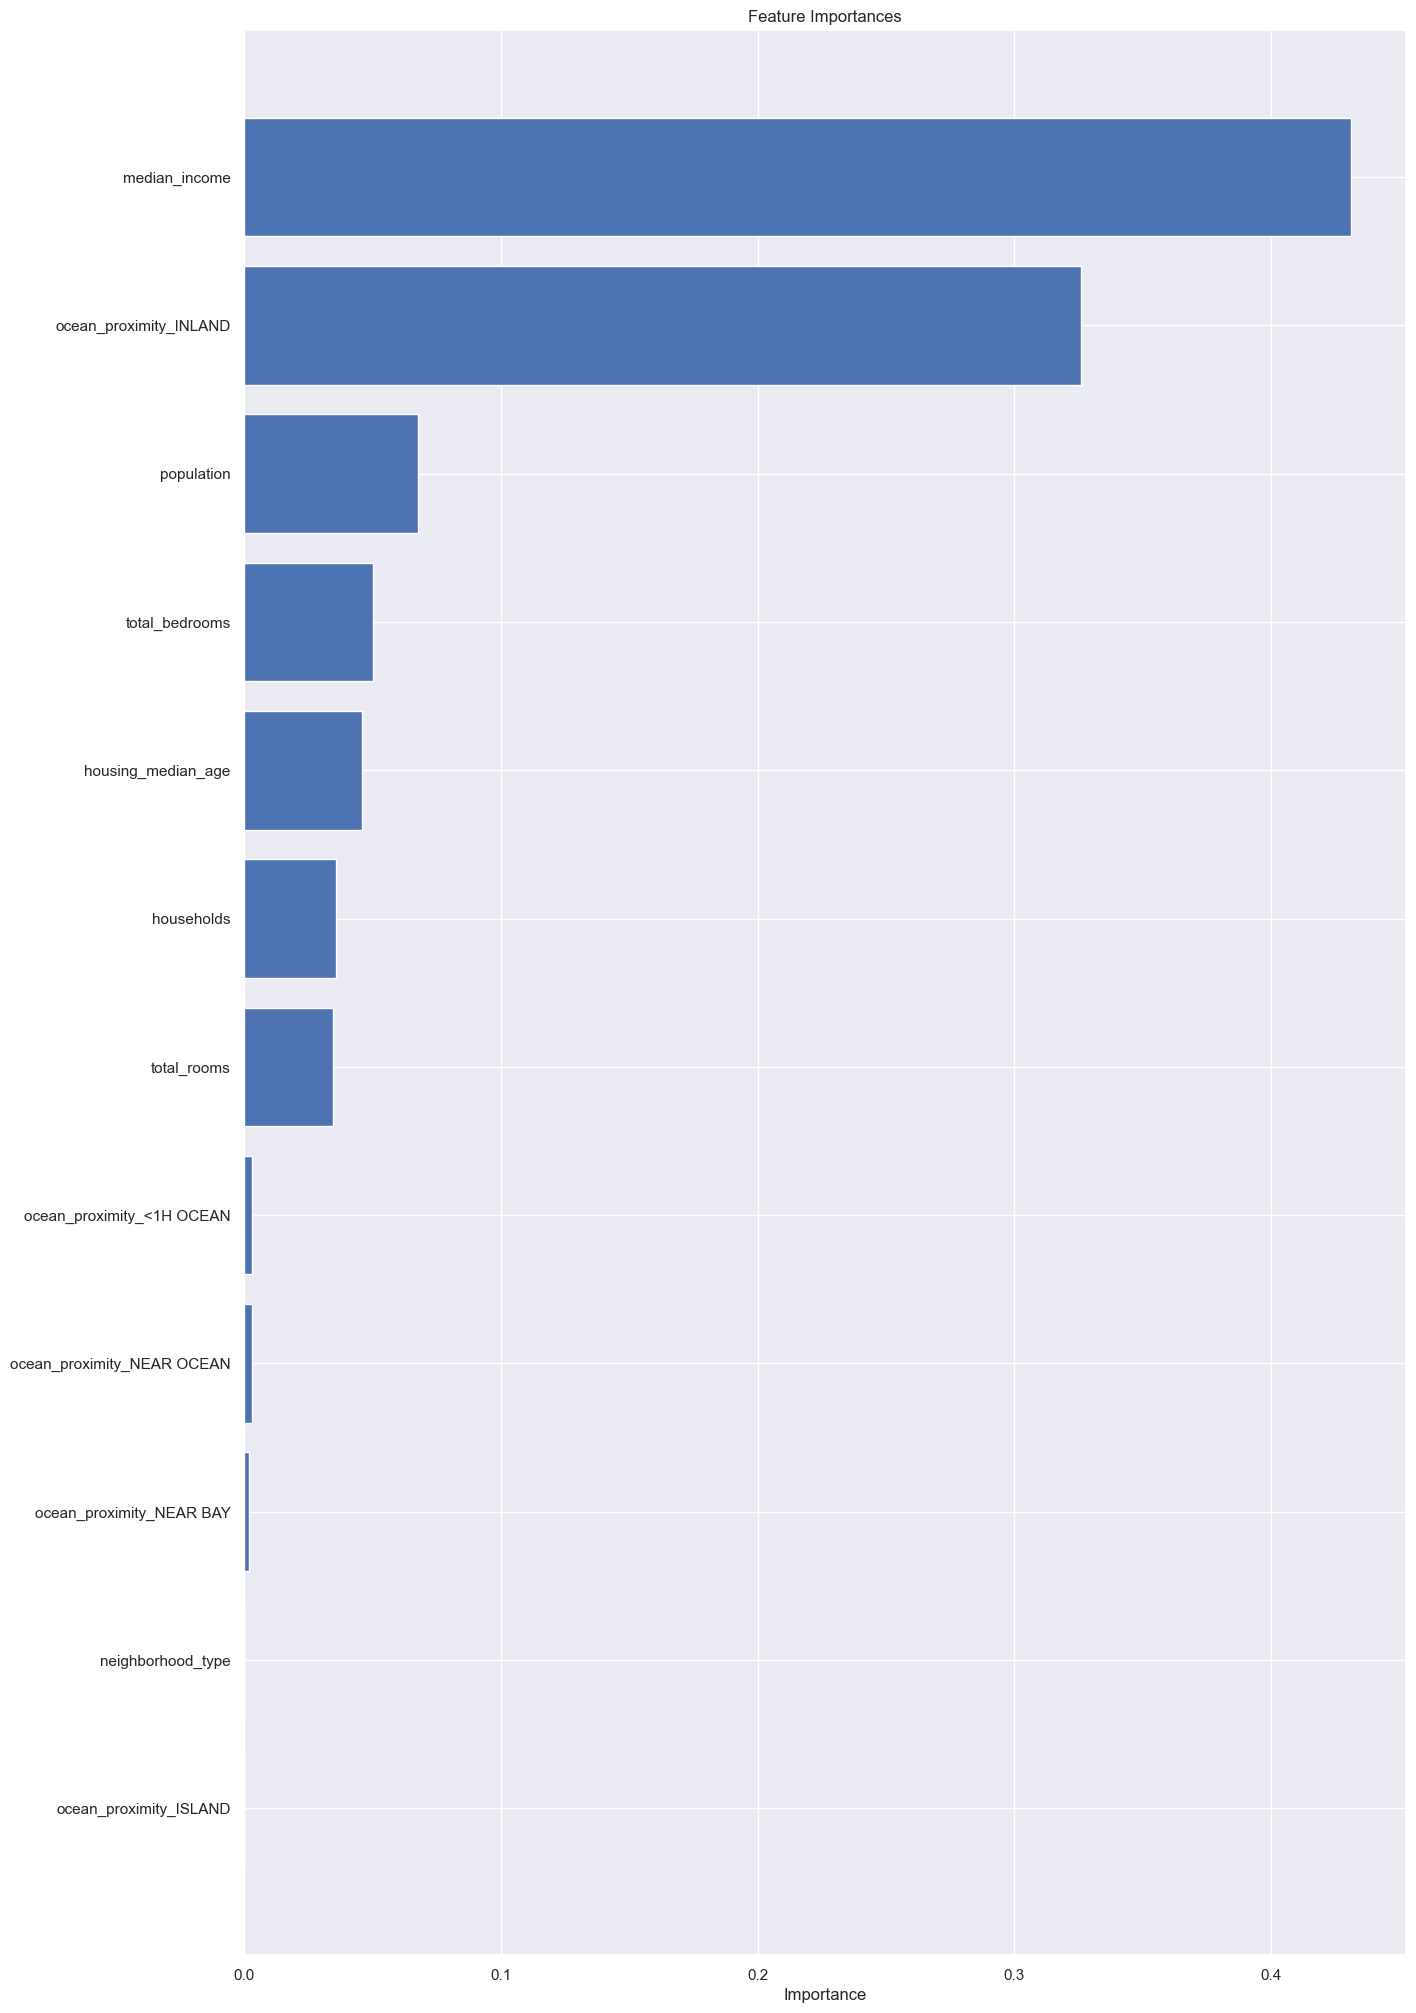

In [50]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

### 
From the chart above, we can observe that;

-median_income plays a huge role when paying for a house.

-Ocean_proximity Inland is also a driving factor for house prices.

-The importance of these 2 features completely overshadows all other features.

-All features denoting very close proximity to the ocean have no bearing on the model's performance, hence the null hypothesis (increased ocean_proximity affects house prices) is rejected.
